In [131]:
import pandas as pd
import requests
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


In [214]:
start = "2012-01-01"




In [176]:
sp500_data = yf.download("^GSPC",start)['Adj Close']


[*********************100%***********************]  1 of 1 completed


In [177]:
sp500_rollingmax = sp500_data.cummax()

In [178]:
sp500_drawdown = (sp500_data - sp500_rollingmax)/sp500_rollingmax * 100


In [179]:
sp500_drawdown

Ticker,^GSPC
Date,
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,-0.077067
2017-01-06,0.000000
2017-01-09,-0.354859
...,...
2024-12-18,-3.581284
2024-12-19,-3.664697
2024-12-20,-2.617617


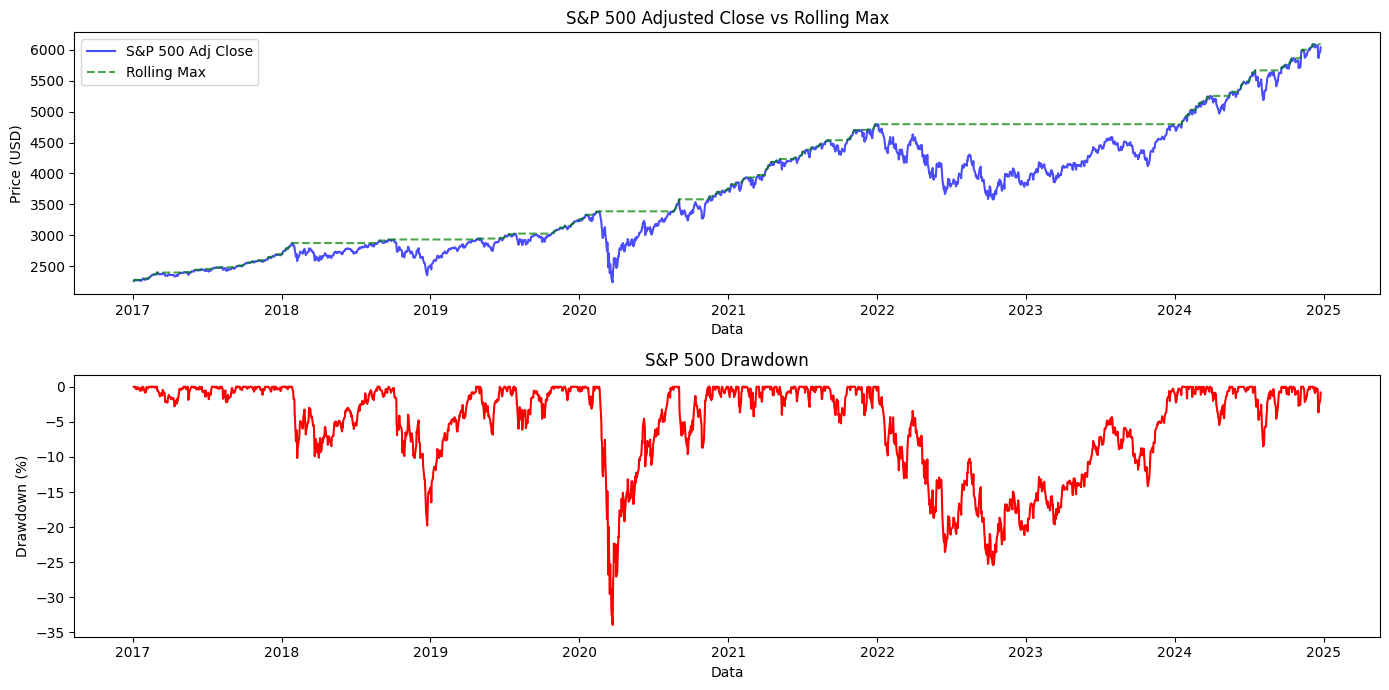

In [180]:
plt.figure(figsize=(14, 7))


plt.subplot(2, 1, 1)
plt.plot(sp500_data, label='S&P 500 Adj Close', color='blue', alpha=0.7)
plt.plot(sp500_rollingmax, label='Rolling Max', color='green', linestyle='--', alpha=0.7)
plt.title('S&P 500 Adjusted Close vs Rolling Max')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Price (USD)')


plt.subplot(2, 1, 2)
plt.plot(sp500_drawdown, label='Drawdown (%)', color='red')
plt.title('S&P 500 Drawdown')
plt.xlabel('Data')
plt.ylabel('Drawdown (%)')


plt.tight_layout()
plt.show()

In [210]:

base_url = 'https://api.stlouisfed.org//fred/'
FRED_key = '429c7bb6ba1c72479e276f06b345db1d'
obs_endpoint = 'series/observations'
series_id = 'H41RESPPALDKNWW'
start_date = start
end_date = str(date.today())
ts_frequency = 'w'


In [211]:
obs_params = {
    'series_id': series_id,
    'api_key': FRED_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date
}
response = requests.get(base_url+obs_endpoint,params=obs_params)
if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data.set_index('date', inplace= True)
    obs_data['value'] = obs_data['value'].astype(float)
else:
    print('Failed to retrvie data. Status code:')




/var/folders/m9/j3jd25ls7cbbv4dpcfjkkhw40000gn/T/ipykernel_4902/1495253428.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


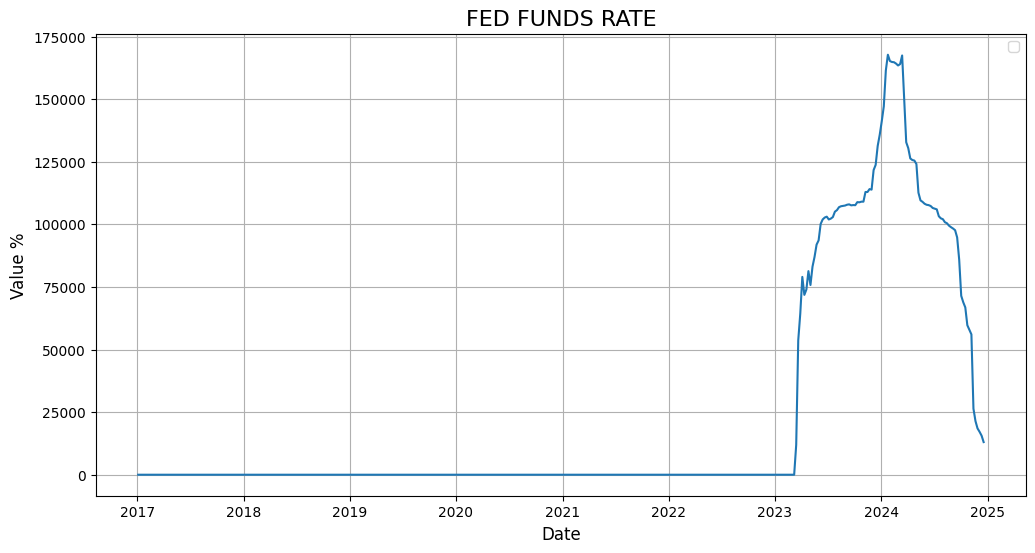

In [212]:
obs_data['value']
plt.figure(figsize=(12, 6))
plt.plot(obs_data['value'])
plt.title('FED FUNDS RATE', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value %', fontsize=12)
plt.legend()
plt.grid()
plt.show()

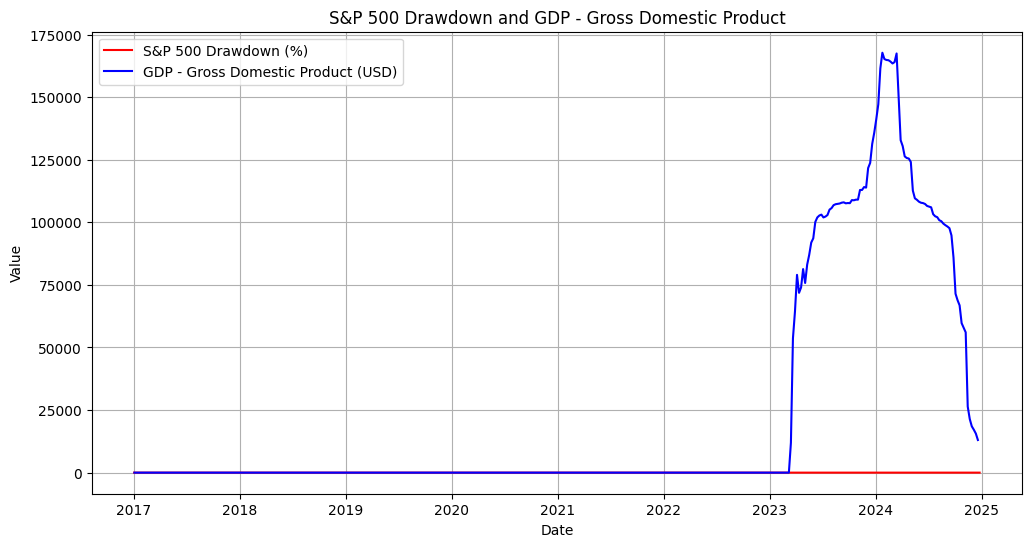

In [213]:
plt.figure(figsize=(12, 6))

# Pierwszy wykres - S&P 500 Drawdown
plt.plot(sp500_drawdown, label='S&P 500 Drawdown (%)', color='red')

# Drugi wykres - GDP
plt.plot(obs_data['value'], label='GDP - Gross Domestic Product (USD)', color='blue')

# Dodanie tytułów, etykiet i legendy
plt.title('S&P 500 Drawdown and GDP - Gross Domestic Product')
plt.xlabel('Date')
plt.ylabel('Value')

# Dodanie legendy, aby zidentyfikować oba wykresy
plt.legend()

# Dodanie siatki
plt.grid(True)

# Wyświetlanie wykresu
plt.show()